In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt






In [2]:
data=pd.read_csv('LoanStats3a.csv')

F:\PGPDSE\Python\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data['id'].isnull().sum()

42535

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape[0]   #no. of rows

42535

In [6]:
data.isnull().sum()   #checking column-wise null counts
    

id                                            42535
member_id                                     42535
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      2626
emp_length                                     1112
home_ownership                                    0
annual_inc                                        4
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                           42535
desc        

In [7]:
a=[]
for i in data.columns:
    if (data[i].isnull().sum())>(0.9*data.shape[0]):
        a.append(i)
        data=data.drop(i,axis=1)
print(a)                                                  #dropping the columns with more than 90% missing values

['id', 'member_id', 'url', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cre

In [8]:
data.shape        #shape of data after dropping the columns with more than 90% missing values

(42535, 54)

In [9]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,0.0,1,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,0.0,1,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,0.0,1,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,1,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0.0,1,Individual,0.0,0.0,0.0,0.0,0.0,N,N


In [10]:
data.describe()     #statistical summary of the data

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,15609.000000,42506.000000,...,42535.000000,42535.000000,42535.000000,42390.0,42535.0,42506.000000,42390.0,42506.000000,41170.000000,42430.000000
mean,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,1.081424,35.017618,9.343951,...,103.199267,14.420927,2613.245652,0.0,1.0,0.000094,0.0,0.143039,0.045227,0.000024
std,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,1.527455,22.418427,4.496274,...,736.777540,162.317803,4385.066535,0.0,0.0,0.009700,0.0,29.359579,0.208737,0.004855
min,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,6.000000,...,0.000000,0.000000,211.050000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,33.000000,9.000000,...,0.000000,0.000000,528.360000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,51.000000,12.000000,...,0.000000,0.000000,3170.220000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,120.000000,47.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000


In [11]:
data.info()        #checking the dtype and null counts in data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 54 columns):
loan_amnt                     42535 non-null int64
funded_amnt                   42535 non-null int64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
pymnt_plan                    42535 non-null object
desc                          29242 non-null object
purpos

In [12]:
numeric=[]

for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
        print(data[i].unique())
        print(i)                        #extracting numeric columns from the data

[4975.        2500.        2400.        ...  899.99576    749.9994052
 1099.996405 ]
funded_amnt_inv
[162.87  59.83  84.33 ...  32.11  80.69 204.84]
installment
[24000. 30000. 12252. ...  7280. 66624.  6500.]
annual_inc
[27.65  1.    8.72 ... 28.16 29.41 28.43]
dti
[ 0.  2.  3.  1.  4.  6.  5.  8.  7.  9. 11. nan 13.]
delinq_2yrs
[ 1.  5.  2.  0.  3.  4.  6.  7.  8.  9. 10. 11. 12. 15. 14. 33. 17. 32.
 24. 13. 18. 16. 31. 28. 25. 27. 20. 19. nan]
inq_last_6mths
[ nan  35.  38.  61.   8.  20.  18.  68.  45.  48.  41.  40.  74.  25.
  53.  39.  10.  26.  56.  77.  28.  52.  24.  16.  60.  54.  23.   9.
  11.  13.  65.  19.  80.  22.  59.  79.  44.  64.  57.  14.  63.  49.
  15.  73.  70.  29.  51.   5.  75.  55.   2.  30.  47.  33.  69.   4.
  43.  21.  27.  46.  81.  78.  82.  31.  76.  62.  72.  42.  50.   3.
  12.  67.  36.  34.  58.  17.  71.  66.  32.   6.  37.   7.   1.  83.
  86. 115.  96. 103. 120. 106.  89. 107.  85.  97.  95.   0.]
mths_since_last_delinq
[ 3.  2. 10. 15.  9.  7

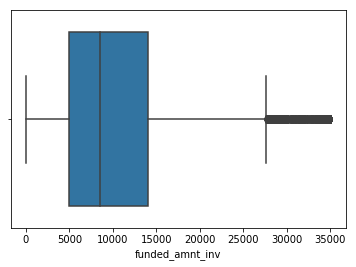

funded_amnt_inv


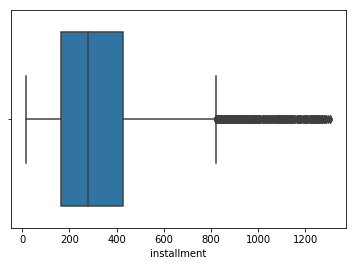

installment


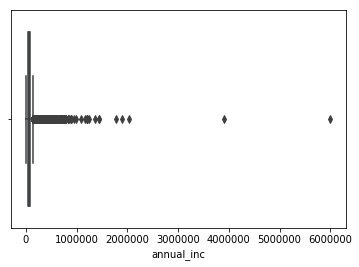

annual_inc


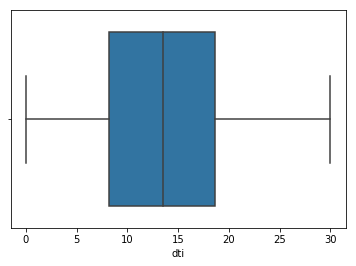

dti


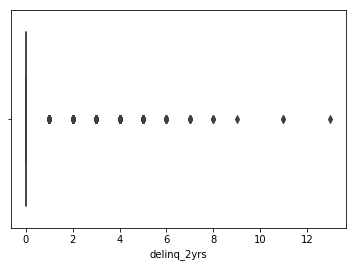

delinq_2yrs


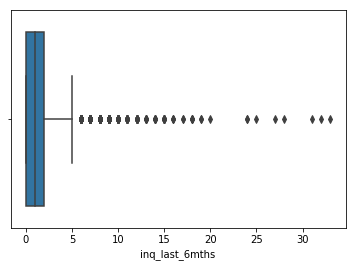

inq_last_6mths


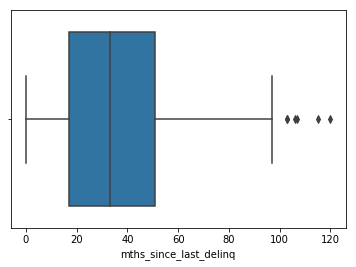

mths_since_last_delinq


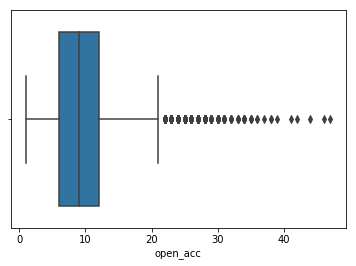

open_acc


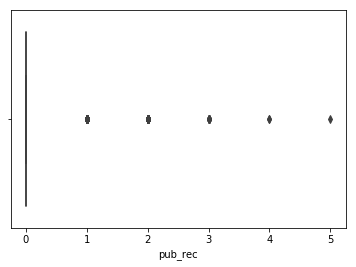

pub_rec


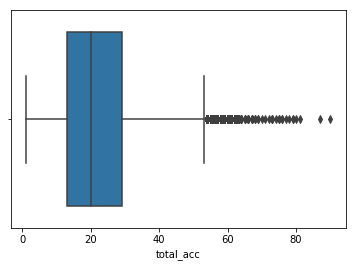

total_acc


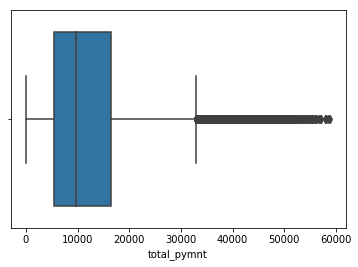

total_pymnt


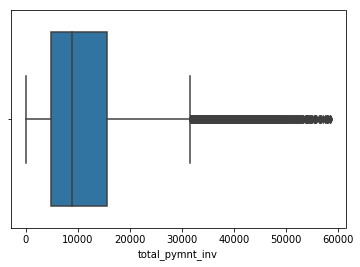

total_pymnt_inv


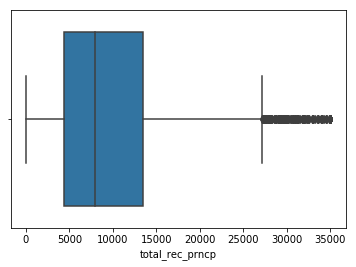

total_rec_prncp


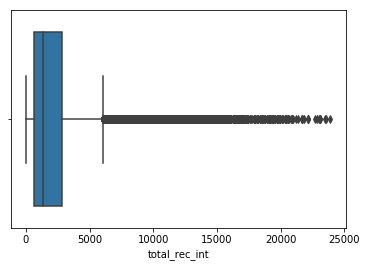

total_rec_int


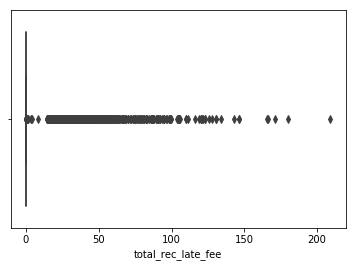

total_rec_late_fee


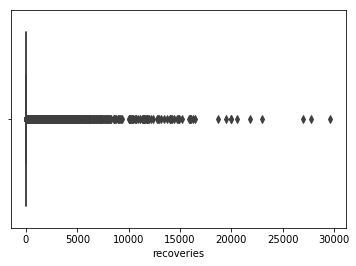

recoveries


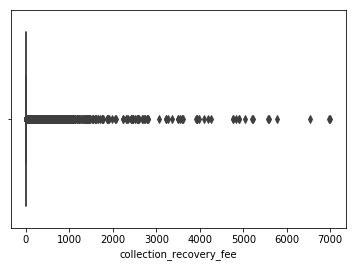

collection_recovery_fee


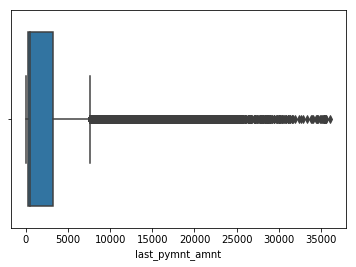

last_pymnt_amnt


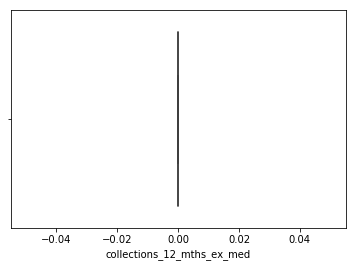

collections_12_mths_ex_med


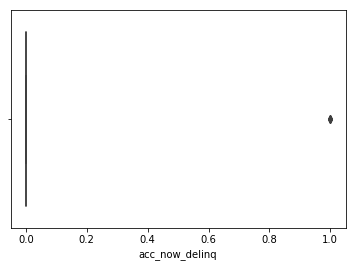

acc_now_delinq


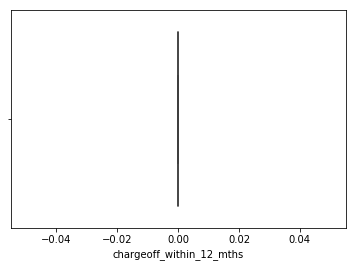

chargeoff_within_12_mths


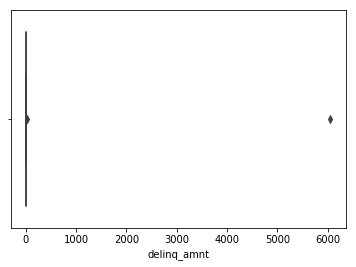

delinq_amnt


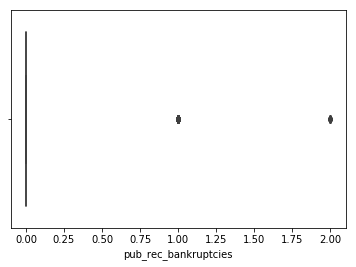

pub_rec_bankruptcies


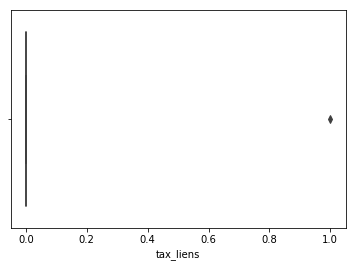

tax_liens


In [13]:

float=[]
for i in data.columns:
    if data[i].dtype=='float64':
        sns.boxplot(data[pd.notna(data[i])][i])
        plt.show()
        print(i)                                   #checking the distribution of the numeric columns
                                            # It is observed that the datapoints in max. columns consist multivariate outliers
                                            #Data in max. columns are skewed towards right

F:\PGPDSE\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


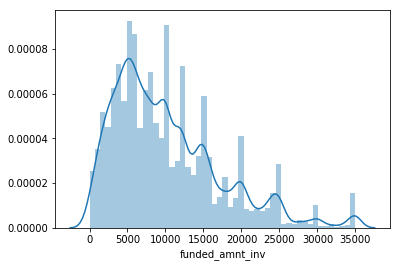

funded_amnt_inv


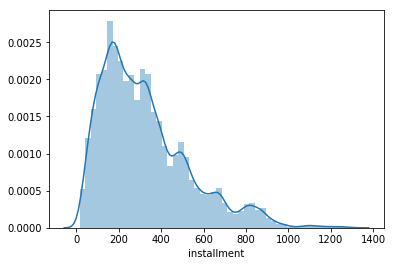

installment


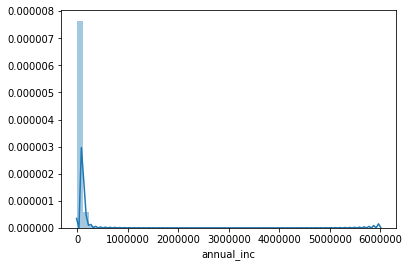

annual_inc


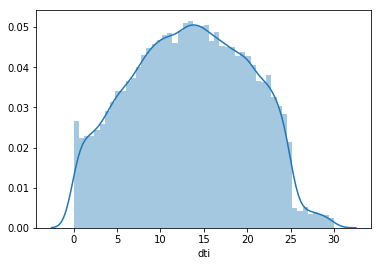

dti


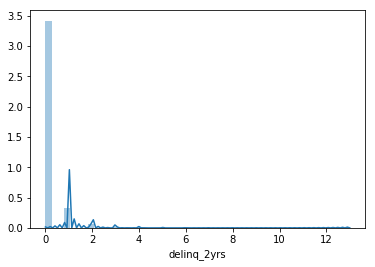

delinq_2yrs


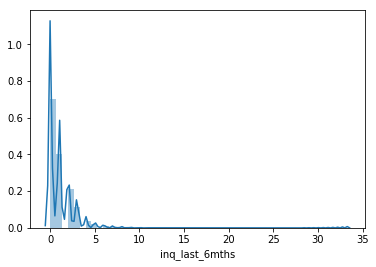

inq_last_6mths


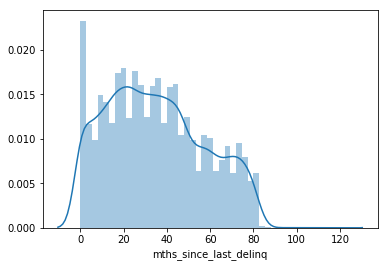

mths_since_last_delinq


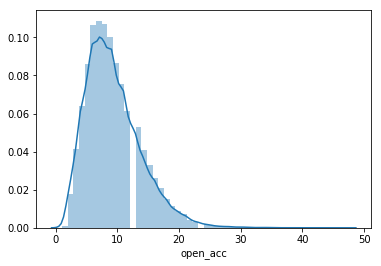

open_acc


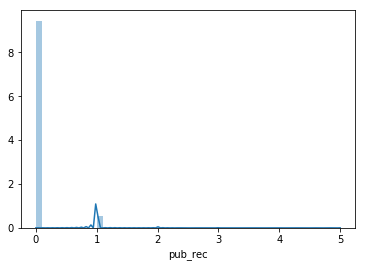

pub_rec


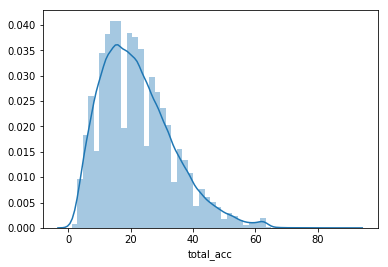

total_acc


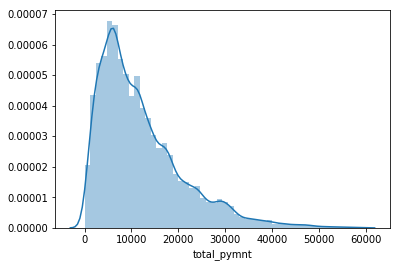

total_pymnt


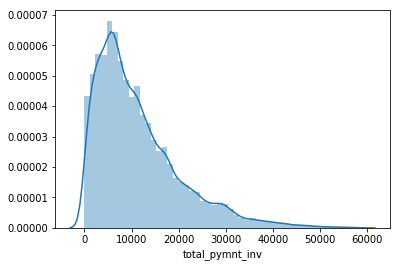

total_pymnt_inv


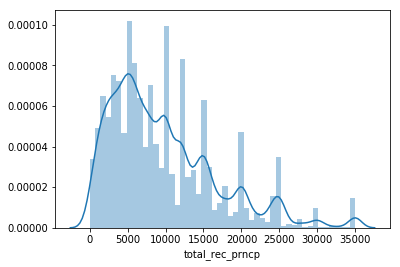

total_rec_prncp


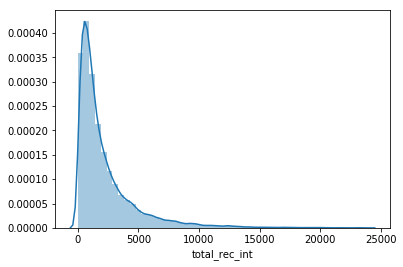

total_rec_int


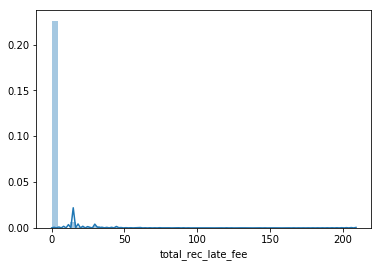

total_rec_late_fee


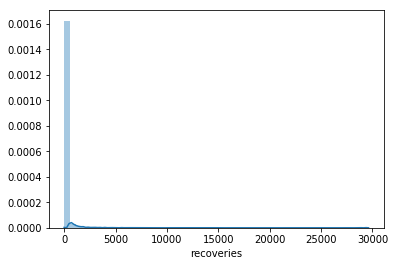

recoveries


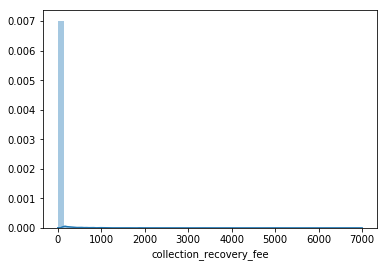

collection_recovery_fee


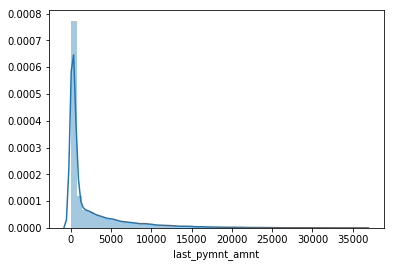

last_pymnt_amnt


F:\PGPDSE\Python\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\PGPDSE\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
F:\PGPDSE\Python\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


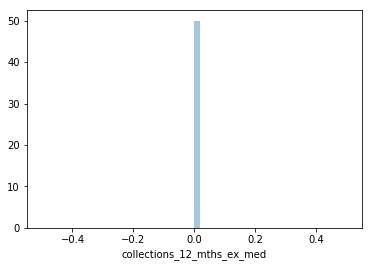

collections_12_mths_ex_med


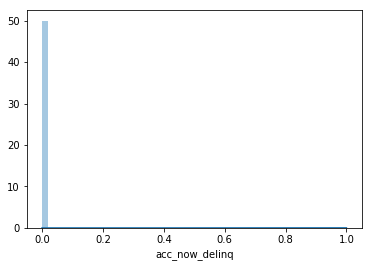

acc_now_delinq


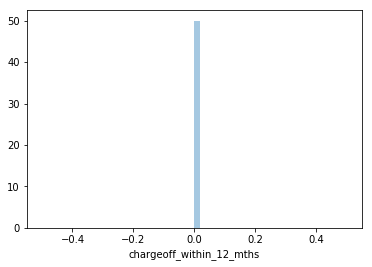

chargeoff_within_12_mths


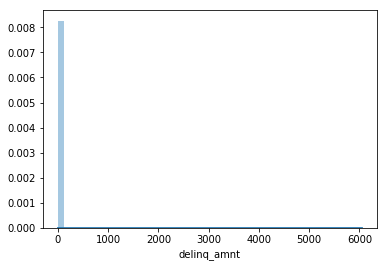

delinq_amnt


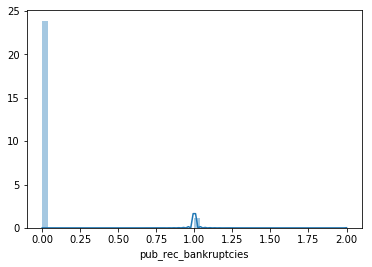

pub_rec_bankruptcies


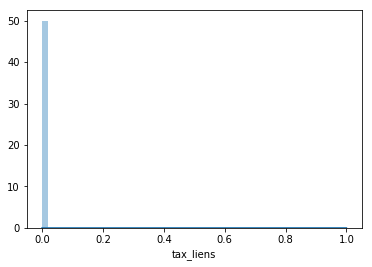

tax_liens


In [14]:
 for i in data.columns:
    if data[i].dtype=='float64':
        sns.distplot(data[pd.notna(data[i])][i])
        plt.show()
        print(i)                                   #distplot showing the skewness of the data in columns

In [15]:
#data is right skewed

#too many outliers in the data

In [16]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [17]:
#Extracting the correlation between numeric values 

In [18]:
x=[]
y=[]
z=[]

for i in numeric:
    
    
    for j in numeric:
        
        if data[i].dtype=='float64' or data[j].dtype=='float64':
            
            print(i, 'and', j ,'have correlation value')
            print((data[pd.notna(data[i])][i]).corr(data[pd.notna(data[j])][j]))
            x.append(i)
            y.append(j)
            z.append((data[pd.notna(data[i])][i]).corr(data[pd.notna(data[j])][j]))
            corr=pd.DataFrame([x,y,z],index=('var1','var2','correlation'))

funded_amnt_inv and funded_amnt_inv have correlation value
1.0
funded_amnt_inv and installment have correlation value
0.890150703285774
funded_amnt_inv and annual_inc have correlation value
0.2523294442748821
funded_amnt_inv and dti have correlation value
0.07107280949831071
funded_amnt_inv and delinq_2yrs have correlation value
-0.043868408723650595
funded_amnt_inv and inq_last_6mths have correlation value
-0.07491293936395321
funded_amnt_inv and mths_since_last_delinq have correlation value
0.10470716674132725
funded_amnt_inv and open_acc have correlation value
0.1563612127240656
funded_amnt_inv and pub_rec have correlation value
-0.05574213939510936
funded_amnt_inv and total_acc have correlation value
0.24085777175960074
funded_amnt_inv and total_pymnt have correlation value
0.8734095074241622
funded_amnt_inv and total_pymnt_inv have correlation value
0.9130195726735537
funded_amnt_inv and total_rec_prncp have correlation value
0.8415470569023964
funded_amnt_inv and total_rec_int ha

nan
delinq_2yrs and acc_now_delinq have correlation value
0.07284507270158894
delinq_2yrs and chargeoff_within_12_mths have correlation value
nan
delinq_2yrs and delinq_amnt have correlation value
0.12165062174442488
delinq_2yrs and pub_rec_bankruptcies have correlation value
0.004708236755420678
delinq_2yrs and tax_liens have correlation value
-0.0014519599796625736
inq_last_6mths and funded_amnt_inv have correlation value
-0.07491293936395405
inq_last_6mths and installment have correlation value
-0.010882479551144304
inq_last_6mths and annual_inc have correlation value
0.02776436210879991
inq_last_6mths and dti have correlation value
0.014241245835432896
inq_last_6mths and delinq_2yrs have correlation value
0.020872299559707028
inq_last_6mths and inq_last_6mths have correlation value
1.0
inq_last_6mths and mths_since_last_delinq have correlation value
-0.04655458009350681
inq_last_6mths and open_acc have correlation value
0.0950423274950654
inq_last_6mths and pub_rec have correlation

1.0
total_acc and total_pymnt have correlation value
0.22372108359369083
total_acc and total_pymnt_inv have correlation value
0.21620616140256013
total_acc and total_rec_prncp have correlation value
0.2292233595744811
total_acc and total_rec_int have correlation value
0.15028495998127567
total_acc and total_rec_late_fee have correlation value
-0.02226476740457329
total_acc and recoveries have correlation value
0.02383467206199596
total_acc and collection_recovery_fee have correlation value
0.011135703919504787
total_acc and last_pymnt_amnt have correlation value
0.15972100712868417
total_acc and collections_12_mths_ex_med have correlation value
nan
total_acc and acc_now_delinq have correlation value
-0.006589606082592947
total_acc and chargeoff_within_12_mths have correlation value
nan
total_acc and delinq_amnt have correlation value
-0.00047441667985058877
total_acc and pub_rec_bankruptcies have correlation value
-0.003934094556841592
total_acc and tax_liens have correlation value
-0.

-0.0033829046863235205
total_rec_late_fee and funded_amnt_inv have correlation value
0.020079288695276858
total_rec_late_fee and installment have correlation value
0.05724413999972037
total_rec_late_fee and annual_inc have correlation value
0.009742834411867119
total_rec_late_fee and dti have correlation value
-0.010959349065037552
total_rec_late_fee and delinq_2yrs have correlation value
0.03457448411860129
total_rec_late_fee and inq_last_6mths have correlation value
0.061024064307955955
total_rec_late_fee and mths_since_last_delinq have correlation value
-0.03457560366912297
total_rec_late_fee and open_acc have correlation value
-0.01348389363554581
total_rec_late_fee and pub_rec have correlation value
-0.00015083153413856062
total_rec_late_fee and total_acc have correlation value
-0.022264767404571638
total_rec_late_fee and total_pymnt have correlation value
0.017072197427275587
total_rec_late_fee and total_pymnt_inv have correlation value
-0.001747114160631421
total_rec_late_fee an

nan
collections_12_mths_ex_med and total_acc have correlation value
nan
collections_12_mths_ex_med and total_pymnt have correlation value
nan
collections_12_mths_ex_med and total_pymnt_inv have correlation value
nan
collections_12_mths_ex_med and total_rec_prncp have correlation value
nan
collections_12_mths_ex_med and total_rec_int have correlation value
nan
collections_12_mths_ex_med and total_rec_late_fee have correlation value
nan
collections_12_mths_ex_med and recoveries have correlation value
nan
collections_12_mths_ex_med and collection_recovery_fee have correlation value
nan
collections_12_mths_ex_med and last_pymnt_amnt have correlation value
nan
collections_12_mths_ex_med and collections_12_mths_ex_med have correlation value
nan
collections_12_mths_ex_med and acc_now_delinq have correlation value
nan
collections_12_mths_ex_med and chargeoff_within_12_mths have correlation value
nan
collections_12_mths_ex_med and delinq_amnt have correlation value
nan
collections_12_mths_ex_me

pub_rec_bankruptcies and pub_rec_bankruptcies have correlation value
0.9999999999999991
pub_rec_bankruptcies and tax_liens have correlation value
nan
tax_liens and funded_amnt_inv have correlation value
-0.006242190517593905
tax_liens and installment have correlation value
-0.005929489097770635
tax_liens and annual_inc have correlation value
-0.0018276309100429564
tax_liens and dti have correlation value
-0.0033464092257001906
tax_liens and delinq_2yrs have correlation value
-0.0014519599796627885
tax_liens and inq_last_6mths have correlation value
0.022088416786865923
tax_liens and mths_since_last_delinq have correlation value
-0.01260386431002884
tax_liens and open_acc have correlation value
-0.002532753946950848
tax_liens and pub_rec have correlation value
0.01860963102355094
tax_liens and total_acc have correlation value
-0.006340515957079534
tax_liens and total_pymnt have correlation value
-0.005120153201802136
tax_liens and total_pymnt_inv have correlation value
-0.00543609748532

In [19]:
correlation=corr.T

correlation.head()

,var1,var2,correlation
0,funded_amnt_inv,funded_amnt_inv,1
1,funded_amnt_inv,installment,0.890151
2,funded_amnt_inv,annual_inc,0.252329
3,funded_amnt_inv,dti,0.0710728
4,funded_amnt_inv,delinq_2yrs,-0.0438684


In [20]:
high=correlation[correlation['correlation']>0.5]

In [21]:
high[high['correlation']<1]      #there is high multicollinearity

,var1,var2,correlation
1,funded_amnt_inv,installment,0.890151
10,funded_amnt_inv,total_pymnt,0.87341
11,funded_amnt_inv,total_pymnt_inv,0.91302
12,funded_amnt_inv,total_rec_prncp,0.841547
13,funded_amnt_inv,total_rec_int,0.726552
24,installment,funded_amnt_inv,0.890151
25,installment,installment,1
34,installment,total_pymnt,0.84861
35,installment,total_pymnt_inv,0.799652
36,installment,total_rec_prncp,0.843359


In [22]:
data['term']=data['term'].str.replace('[^0-9]','')   #treatment of term column

data['term'].head(5)

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: object

In [23]:
data['int_rate']=data['int_rate'].str.replace('[^0-9.]','')    #treatment for int_rate

data['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [24]:
data['emp_length']=data['emp_length'].str.replace('[^0-9<+]','')

data['emp_length'].head(5)

0    10+
1     <1
2    10+
3    10+
4      1
Name: emp_length, dtype: object

In [25]:
data['emp_length'].unique()

data['emp_length'].replace(['<1','1','2'],'0-2 years',inplace=True)
data['emp_length'].replace(['3','4','5'],'2-5 years',inplace=True)
data['emp_length'].replace(['6','7','8'],'5-8 years',inplace=True)
data['emp_length'].replace(['9','10+'],'More than 9',inplace=True)
data['emp_length'].value_counts()

0-2 years      13400
2-5 years      11471
More than 9    10710
5-8 years       5842
Name: emp_length, dtype: int64

In [26]:
data['loan_status']=data['loan_status'].replace(('Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off'),('Fully Paid', 'Charged Off'))

data['loan_status'].head(5)

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4     Fully Paid
Name: loan_status, dtype: object

In [27]:
data['revol_util']=data['revol_util'].str.replace('[^0-9.]','')

data['revol_util'].head(5)

0    83.70
1     9.40
2    98.50
3       21
4    53.90
Name: revol_util, dtype: object

In [28]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print(i,data[i].isnull().sum())

emp_title 2626
emp_length 1112
annual_inc 4
desc 13293
title 13
delinq_2yrs 29
earliest_cr_line 29
inq_last_6mths 29
mths_since_last_delinq 26926
open_acc 29
pub_rec 29
revol_util 90
total_acc 29
last_pymnt_d 83
last_credit_pull_d 4
collections_12_mths_ex_med 145
acc_now_delinq 29
chargeoff_within_12_mths 145
delinq_amnt 29
pub_rec_bankruptcies 1365
tax_liens 105


In [29]:
data[numeric].groupby(data['grade']).median()

,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,total_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
grade,,,,,,,,,,,,,,,,,,,,,
A,7000.0,222.06,57600.0,11.500,0.0,0.0,38.0,9.0,0.0,22.0,...,0.0,0.0,0.0,469.360,0.0,0.0,0.0,0.0,0.0,0.0
B,8975.0,273.23,57996.0,13.500,0.0,0.0,35.0,9.0,0.0,20.0,...,0.0,0.0,0.0,550.700,0.0,0.0,0.0,0.0,0.0,0.0
C,8000.0,276.06,56000.0,14.050,0.0,1.0,33.0,8.0,0.0,19.0,...,0.0,0.0,0.0,500.720,0.0,0.0,0.0,0.0,0.0,0.0
D,9550.0,306.36,58000.0,14.305,0.0,1.0,32.0,8.0,0.0,19.0,...,0.0,0.0,0.0,521.215,0.0,0.0,0.0,0.0,0.0,0.0
E,12000.0,361.52,62000.0,14.600,0.0,1.0,30.0,9.0,0.0,20.0,...,0.0,0.0,0.0,637.410,0.0,0.0,0.0,0.0,0.0,0.0
F,14650.0,452.77,70556.0,15.140,0.0,1.0,27.0,9.0,0.0,21.0,...,0.0,0.0,0.0,763.870,0.0,0.0,0.0,0.0,0.0,0.0
G,14400.0,526.73,75000.0,15.960,0.0,1.0,23.0,10.0,0.0,23.0,...,0.0,0.0,0.0,694.540,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
data[numeric].groupby(data['grade']).mean()

,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,total_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
grade,,,,,,,,,,,,,,,,,,,,,
A,8118.220295,255.976318,66728.344921,12.043492,0.044632,0.687180,38.954911,9.430495,0.014943,23.432560,...,0.551002,21.383188,3.241618,1935.115788,0.0,0.000098,0.0,0.000000,0.012881,0.000000
B,10218.879847,319.429080,67915.047804,13.392900,0.114630,0.867275,36.444554,9.189918,0.054770,21.946926,...,1.046598,61.769195,7.434201,2644.902052,0.0,0.000000,0.0,0.000000,0.045222,0.000000
C,9802.378579,317.827420,68177.588568,13.846410,0.184681,1.312228,34.969595,9.191550,0.077513,21.197504,...,1.881723,106.481146,16.077534,2507.631596,0.0,0.000000,0.0,0.000000,0.059458,0.000000
D,10795.355016,353.858813,68261.487146,13.970959,0.247548,1.381380,33.916667,9.199335,0.082294,20.995844,...,2.115440,139.721438,19.340380,2731.072146,0.0,0.000000,0.0,0.000000,0.059526,0.000000
E,13044.810309,403.603179,75892.024558,14.175636,0.259652,1.494842,32.626131,9.609785,0.087533,22.098143,...,2.709039,236.872641,30.804766,3754.931450,0.0,0.000589,0.0,1.783967,0.066374,0.000296
F,15112.898833,478.282967,83062.405772,14.641453,0.322829,1.705611,30.696065,10.304381,0.096080,23.762490,...,3.654254,455.147503,67.169654,4145.242444,0.0,0.000000,0.0,0.000000,0.078203,0.000000
G,14607.703878,507.923145,93055.818184,15.686172,0.398438,2.304688,27.933121,11.445312,0.093750,25.507812,...,5.512362,467.334453,77.097563,4291.797402,0.0,0.001953,0.0,0.052734,0.077098,0.000000


#### Adding Region wise 

In [31]:
data['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [32]:
data['addr_state'].replace(['WA','OR','ID','MT','WY','CO','UT','NV','CA'],'WEST',inplace=True)

In [33]:
data['addr_state'].replace(['ND','MN','WI','MI','OH','IN','IL','MO','KS','NE','SD','IA'],'MID-WEST',inplace=True)

In [34]:
data['addr_state'].replace(['MD','PA','NY','VT','ME','NH','MA','RI','CT','NJ'],'NORTH-EAST',inplace=True)

In [35]:
data['addr_state'].replace(['DE','DC','WV','VA','NC','SC','GA','FL','KL','AL','MS','LA','AR','TN','KY'],'SOUTH-EAST',inplace=True)

In [36]:
data['addr_state'].replace(['TX','OK','NM','AZ'],'SOUTH-WEST',inplace=True)

In [37]:
data['addr_state'].replace(['HI','AK'],'WEST',inplace=True)

In [38]:
data['addr_state'].value_counts()

NORTH-EAST    11539
WEST          10906
SOUTH-EAST     9583
MID-WEST       6137
SOUTH-WEST     4370
Name: addr_state, dtype: int64

In [39]:
data.groupby(['addr_state'])['funded_amnt'].sum().sort_values(ascending=False)

addr_state
NORTH-EAST    125653850
WEST          119053775
SOUTH-EAST    102177275
MID-WEST       65144475
SOUTH-WEST     48266775
Name: funded_amnt, dtype: int64

Text(0.5,1,'Region Wise Loan funded')

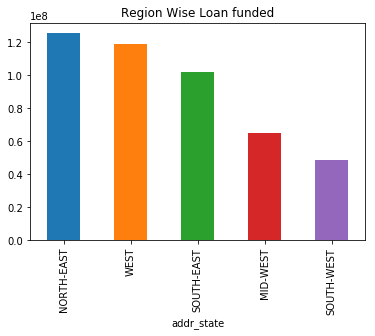

In [40]:
data.groupby(['addr_state'])['funded_amnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Region Wise Loan funded")

In [41]:
#imputing ussue_date

In [42]:
data['issue_d']=data['issue_d'].replace(('11-Dec','11-Nov','11-Oct','11-Sep','11-Aug','11-Jul','11-Jun','11-May','11-Apr','11-Mar','11-Feb','11-Jan'),2011)
data['issue_d']=data['issue_d'].replace(('10-Dec','10-Nov','10-Oct','10-Sep','10-Aug','10-Jul','10-Jun','10-May','10-Apr','10-Mar','10-Feb','10-Jan'),2010)
data['issue_d']=data['issue_d'].replace(('9-Dec','9-Nov','9-Oct','9-Sep','9-Aug','9-Jul','9-Jun','9-May','9-Apr','9-Mar','9-Feb','9-Jan'),2009)
data['issue_d']=data['issue_d'].replace(('8-Dec','8-Nov','8-Oct','8-Sep','8-Aug','8-Jul','8-Jun','8-May','8-Apr','8-Mar','8-Feb','8-Jan'),2008)
data['issue_d']=data['issue_d'].replace(('7-Dec','7-Nov','7-Oct','7-Sep','7-Aug','7-Jul','7-Jun','7-May','7-Apr','7-Mar','7-Feb','7-Jan'),2007)


In [43]:
data['issue_d'].unique()

array([2011, 2010, 2009, 2008, 2007], dtype=int64)

In [44]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print(i,data[i].isnull().sum())
        print(data[i].unique())
        print(len(data[i].unique()))

emp_title 2626
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'Tanks Tavern'
 'Halping hands company inc.' 'Homemaker']
30659
emp_length 1112
['More than 9' '0-2 years' '2-5 years' '5-8 years' nan]
5
annual_inc 4
[24000. 30000. 12252. ...  7280. 66624.  6500.]
5598
desc 13293
['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'
 '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>'
 nan ...
 'I need to pay $2,100 for fixing my Volvo :) 

last_credit_pull_d 4
['18-Dec' '16-Oct' '17-Jun' '16-Apr' '18-Apr' '17-Feb' '14-Dec' '16-Dec'
 '18-Nov' '17-Apr' '18-Oct' '18-Sep' '14-May' '15-Jul' '16-Feb' '19-Apr'
 '18-Jan' '14-Mar' '12-Sep' '19-Feb' '15-Jan' '18-Mar' '17-Jan' '18-Aug'
 '18-Jun' '19-Mar' '15-Dec' '12-Jun' '19-Jan' '18-Jul' '15-Mar' '14-Sep'
 '16-Jan' '14-Apr' '14-Oct' '18-Feb' '14-Feb' '15-Nov' '14-Jul' '12-Dec'
 '13-Feb' '17-Jul' '16-Jun' '17-Oct' '16-Jul' '15-Jun' '18-May' '12-Feb'
 '13-Nov' '16-Nov' '15-Oct' '16-May' '17-Nov' '12-Apr' '17-Aug' '15-Sep'
 '16-Mar' '13-May' '14-Jun' '12-Aug' '13-Sep' '17-Sep' '12-Jan' '14-Aug'
 '13-Oct' '17-May' '17-Mar' '12-May' '16-Aug' '12-Jul' '14-Jan' '13-Jun'
 '17-Dec' '15-Aug' '13-Dec' '14-Nov' '16-Sep' '12-Nov' '13-Mar' '13-Apr'
 '15-May' '15-Apr' '15-Feb' '13-Jul' '12-Mar' '13-Aug' '12-Oct' '11-Nov'
 '11-Dec' '11-Oct' '11-Sep' '13-Jan' '11-Aug' '11-Jul' '11-Jun' '11-May'
 '11-Apr' '11-Mar' '11-Feb' '11-Jan' '10-Dec' '10-Nov' '10-Oct' nan
 '10-Sep' '10-Aug' '10-Jul' '10-Jun

In [45]:
for i in data.columns:
    print(i,':',data[i].unique(),len(data[i].unique()))

loan_amnt : [ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  8125
 18800 19200 12875  2625 11300  4100 18225 18500 16800  2200 14050 16100
 10525 19775 14500 11700  4150 12375  1700 22250 11200 22500 15900  3150
 18550  8575  7700 24500 22200 21400  9

grade : ['B' 'C' 'A' 'E' 'F' 'D' 'G'] 7
sub_grade : ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5'] 35
emp_title : [nan 'Ryder' 'AIR RESOURCES BOARD' ... 'Tanks Tavern'
 'Halping hands company inc.' 'Homemaker'] 30659
emp_length : ['More than 9' '0-2 years' '2-5 years' '5-8 years' nan] 5
home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE'] 5
annual_inc : [24000. 30000. 12252. ...  7280. 66624.  6500.] 5598
verification_status : ['Verified' 'Source Verified' 'Not Verified'] 3
issue_d : [2011 2010 2009 2008 2007] 5
loan_status : ['Fully Paid' 'Charged Off'] 2
pymnt_plan : ['n'] 1
desc : ['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'
 '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this 

pub_rec : [ 0.  1.  2.  3.  4.  5. nan] 7
revol_bal : [13648  1687  2956 ...  4494  7406  5251] 22709
revol_util : ['83.70' '9.40' '98.50' ... '103.50' '105.30' '105.70'] 1120
total_acc : [ 9.  4. 10. 37. 38. 12. 11. 13.  3. 23. 34. 29. 28. 42. 14. 22. 21. 17.
  7. 31. 44. 26. 16.  6. 18. 27. 24. 25. 40. 35.  8. 20. 15. 19. 36. 51.
 32. 30. 33. 46.  5. 61. 56. 50. 41. 39. 79. 62. 43. 47. 53. 45. 60. 55.
 52. 58. 54. 57. 49. 63. 48. 59. 77. 87. 75. 72. 64. 67. 78. 76. 74. 66.
 81. 90. 80. 71. 69. 73. 70. 68. 65.  2.  1. nan] 84
initial_list_status : ['f'] 1
out_prncp : [0] 1
out_prncp_inv : [0] 1
total_pymnt : [5863.155187 1014.53     3005.666844 ... 2904.498829 7373.904962
 5619.76209 ] 40520
total_pymnt_inv : [5833.84 1014.53 3005.67 ...  261.27  239.11  258.82] 40102
total_rec_prncp : [5000.    456.46 2400.   ... 1962.69  340.5  1791.32] 7691
total_rec_int : [863.16 435.17 605.67 ... 155.6  379.5  619.76] 37462
total_rec_late_fee : [  0.          16.97        15.00000003 ...  51.78  

In [46]:
data.drop(['emp_title','desc','title','earliest_cr_line','inq_last_6mths','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','pymnt_plan','initial_list_status','out_prncp','out_prncp_inv','policy_code','application_type','hardship_flag'],axis=1,inplace=True)



In [47]:
data.shape

(42535, 38)

In [48]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print(i,data[i].isnull().sum())
        print(data[i].unique())

emp_length 1112
['More than 9' '0-2 years' '2-5 years' '5-8 years' nan]
annual_inc 4
[24000. 30000. 12252. ...  7280. 66624.  6500.]
delinq_2yrs 29
[ 0.  2.  3.  1.  4.  6.  5.  8.  7.  9. 11. nan 13.]
mths_since_last_delinq 26926
[ nan  35.  38.  61.   8.  20.  18.  68.  45.  48.  41.  40.  74.  25.
  53.  39.  10.  26.  56.  77.  28.  52.  24.  16.  60.  54.  23.   9.
  11.  13.  65.  19.  80.  22.  59.  79.  44.  64.  57.  14.  63.  49.
  15.  73.  70.  29.  51.   5.  75.  55.   2.  30.  47.  33.  69.   4.
  43.  21.  27.  46.  81.  78.  82.  31.  76.  62.  72.  42.  50.   3.
  12.  67.  36.  34.  58.  17.  71.  66.  32.   6.  37.   7.   1.  83.
  86. 115.  96. 103. 120. 106.  89. 107.  85.  97.  95.   0.]
open_acc 29
[ 3.  2. 10. 15.  9.  7.  4. 11. 14. 12. 20.  8.  6. 17.  5. 13. 16. 30.
 21. 18. 19. 27. 23. 34. 25. 22. 24. 26. 32. 28. 29. 33. 31. 39. 35. 36.
 38. 44. 41. 42.  1. 46. 37. 47. nan]
pub_rec 29
[ 0.  1.  2.  3.  4.  5. nan]
revol_util 90
['83.70' '9.40' '98.50' ... '1

In [49]:
data['annual_inc'].groupby(data['grade']).median()

grade
A    57600.0
B    57996.0
C    56000.0
D    58000.0
E    62000.0
F    70556.0
G    75000.0
Name: annual_inc, dtype: float64

In [50]:
## imputation for annual_inc

data['annual_inc']=data['annual_inc'].fillna(data['annual_inc'].median())

In [51]:
data['annual_inc'].isnull().sum()


0

In [52]:
data['emp_length'].groupby(data['grade']).value_counts()

grade  emp_length 
A      0-2 years      3013
       2-5 years      2694
       More than 9    2656
       5-8 years      1427
B      0-2 years      3859
       2-5 years      3376
       More than 9    3145
       5-8 years      1665
C      0-2 years      2926
       2-5 years      2368
       More than 9    2062
       5-8 years      1202
D      0-2 years      1947
       2-5 years      1654
       More than 9    1460
       5-8 years       835
E      0-2 years      1098
       More than 9     904
       2-5 years       884
       5-8 years       459
F      0-2 years       389
       2-5 years       355
       More than 9     347
       5-8 years       188
G      0-2 years       168
       2-5 years       140
       More than 9     136
       5-8 years        66
Name: emp_length, dtype: int64

In [53]:
data['emp_length'].value_counts()

0-2 years      13400
2-5 years      11471
More than 9    10710
5-8 years       5842
Name: emp_length, dtype: int64

In [54]:
data['emp_length']=data['emp_length'].fillna('0-2 years')

In [55]:
#iputation for delinq_2yrs

data['delinq_2yrs'].value_counts()

0.0     37771
1.0      3595
2.0       771
3.0       244
4.0        72
5.0        27
6.0        13
7.0         6
8.0         3
11.0        2
13.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

In [56]:
data['delinq_2yrs'].groupby(data['grade']).value_counts()

grade  delinq_2yrs
A      0.0             9774
       1.0              352
       2.0               38
       3.0                6
       4.0                2
B      0.0            11251
       1.0              928
       2.0              141
       3.0               43
       4.0                9
       5.0                3
       6.0                3
       11.0               1
C      0.0             7557
       1.0              885
       2.0              197
       3.0               68
       4.0               14
       5.0                8
       6.0                3
       7.0                1
       9.0                1
D      0.0             4982
       1.0              739
       2.0              201
       3.0               55
       4.0               20
       5.0               10
       6.0                4
       7.0                3
       8.0                1
E      0.0             2794
       1.0              429
       2.0              106
       3.0               39
 

In [57]:
data['delinq_2yrs']=data['delinq_2yrs'].fillna(0.0)

In [58]:
#imputation for mths_since_last_delinq

data['mths_since_last_delinq'].groupby(data['grade']).median()

grade
A    38.0
B    35.0
C    33.0
D    32.0
E    30.0
F    27.0
G    23.0
Name: mths_since_last_delinq, dtype: float64

In [59]:
data['mths_since_last_delinq'].median()


33.0

In [60]:
data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].median(),inplace=True)

In [61]:
data['mths_since_last_delinq'].isnull().sum()

0

In [62]:
#imputation for open_acc

In [63]:
data['open_acc'].value_counts()

7.0     4252
8.0     4176
6.0     4172
9.0     3922
10.0    3386
5.0     3368
11.0    2944
4.0     2508
12.0    2398
13.0    2060
3.0     1608
14.0    1597
15.0    1290
16.0    1022
17.0     812
2.0      692
18.0     588
19.0     442
20.0     335
21.0     276
22.0     170
23.0     121
24.0      87
25.0      63
26.0      40
1.0       39
28.0      29
27.0      29
30.0      17
29.0      16
31.0      13
34.0       8
32.0       6
33.0       5
35.0       4
38.0       2
36.0       2
41.0       1
46.0       1
39.0       1
47.0       1
44.0       1
37.0       1
42.0       1
Name: open_acc, dtype: int64

In [64]:
data['open_acc'].groupby(data['grade']).median()

grade
A     9.0
B     9.0
C     8.0
D     8.0
E     9.0
F     9.0
G    10.0
Name: open_acc, dtype: float64

In [65]:
def give_med(x):
    temp=data[data['grade']==x]
    get_med=temp['open_acc'].median()
    return get_med

In [66]:
#imputation groupwise

In [67]:
data['open_acc'][(data['grade']=='A') & (data['open_acc'].isnull())]=give_med('A')
data['open_acc'][(data['grade']=='B')& (data['open_acc'].isnull())]=give_med('B')
data['open_acc'][(data['grade']=='C')& (data['open_acc'].isnull())]=give_med('C')
data['open_acc'][(data['grade']=='D')& (data['open_acc'].isnull())]=give_med('D')
data['open_acc'][(data['grade']=='E')& (data['open_acc'].isnull())]=give_med('E')
data['open_acc'][(data['grade']=='F')& (data['open_acc'].isnull())]=give_med('F')
data['open_acc'][(data['grade']=='C')& (data['open_acc'].isnull())]=give_med('G')

F:\PGPDSE\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\PGPDSE\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\PGPDSE\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\PGPDSE\Python\lib\site-packages\ipykerne

In [68]:
data['open_acc'].isnull().sum()

0

In [69]:
#imputation for pub_rec

In [70]:
data['pub_rec'].value_counts()


0.0    40130
1.0     2298
2.0       64
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64

In [71]:
data['pub_rec'].fillna(0.0,inplace=True)

In [72]:
#imputation for revol_util

In [73]:
data['revol_util'].median()


49.7

In [74]:
data['revol_util'].fillna(data['revol_util'].median(),inplace=True)

In [75]:
#imputation for acc_now_delinq

In [76]:
data['acc_now_delinq'].value_counts()

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64

In [77]:
data['acc_now_delinq'].fillna(0.0,inplace=True)

In [78]:
#imputation for delinq_amnt

In [79]:
data['delinq_amnt'].value_counts()

0.0       42504
6053.0        1
27.0          1
Name: delinq_amnt, dtype: int64

In [80]:
data['delinq_amnt'].fillna(0.0,inplace=True)

In [81]:
#imputation for pub_rec_bankruptcies

In [82]:
data['pub_rec_bankruptcies'].value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [83]:
data['pub_rec_bankruptcies'].fillna(0.0,inplace=True)

In [84]:
data['tax_liens'].value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

In [85]:
data['tax_liens'].fillna(0.0,inplace=True)

In [86]:
#imputation for revol_util

In [87]:
data['revol_util'].median()

49.7

In [88]:
data['revol_util'].fillna(data['revol_util'].median(),inplace=True)

In [89]:
#imputation for total_acc

In [90]:
data['total_acc'].groupby(data['grade']).median()

grade
A    22.0
B    20.0
C    19.0
D    19.0
E    20.0
F    21.0
G    23.0
Name: total_acc, dtype: float64

In [91]:
data['total_acc'][(data['grade']=='A') & (data['total_acc'].isnull())]=22.0
data['total_acc'][(data['grade']=='B')& (data['total_acc'].isnull())]=20.0
data['total_acc'][(data['grade']=='C')& (data['total_acc'].isnull())]=19.0
data['total_acc'][(data['grade']=='D')& (data['total_acc'].isnull())]=19.0
data['total_acc'][(data['grade']=='E')& (data['total_acc'].isnull())]=20.0
data['total_acc'][(data['grade']=='F')& (data['total_acc'].isnull())]=21.0
data['total_acc'][(data['grade']=='C')& (data['total_acc'].isnull())]=23.0

F:\PGPDSE\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\PGPDSE\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\PGPDSE\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\PGPDSE\Python\lib\site-packages\ipykerne

In [92]:
data['total_acc'].isnull().sum()

0

In [93]:
data['revol_util']=data['revol_util'].astype('float64')   #converting teh dtype

In [94]:
#Regression Problem(for int_rate)

In [95]:
#Splitting x & y 

In [96]:
y=data['int_rate']

x=data.drop(['int_rate','loan_status','zip_code','sub_grade'],axis=1)



x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000,5000,4975.0,36,162.87,B,More than 9,RENT,24000.0,Verified,...,863.16,0.00,0.0,0.00,171.62,0.0,0.0,0.0,0.0,N
1,2500,2500,2500.0,60,59.83,C,0-2 years,RENT,30000.0,Source Verified,...,435.17,0.00,122.9,1.11,119.66,0.0,0.0,0.0,0.0,N
2,2400,2400,2400.0,36,84.33,C,More than 9,RENT,12252.0,Not Verified,...,605.67,0.00,0.0,0.00,649.91,0.0,0.0,0.0,0.0,N
3,10000,10000,10000.0,36,339.31,C,More than 9,RENT,49200.0,Source Verified,...,2214.92,16.97,0.0,0.00,357.48,0.0,0.0,0.0,0.0,N
4,3000,3000,3000.0,60,67.79,B,0-2 years,RENT,80000.0,Source Verified,...,1066.91,0.00,0.0,0.00,67.30,0.0,0.0,0.0,0.0,N


In [97]:
x.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'installment',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag'],
      dtype='object')

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 38 columns):
loan_amnt                  42535 non-null int64
funded_amnt                42535 non-null int64
funded_amnt_inv            42535 non-null float64
term                       42535 non-null object
int_rate                   42535 non-null object
installment                42535 non-null float64
grade                      42535 non-null object
sub_grade                  42535 non-null object
emp_length                 42535 non-null object
home_ownership             42535 non-null object
annual_inc                 42535 non-null float64
verification_status        42535 non-null object
issue_d                    42535 non-null int64
loan_status                42535 non-null object
purpose                    42535 non-null object
zip_code                   42535 non-null object
addr_state                 42535 non-null object
dti                        42535 non-null float64
delinq_2

In [99]:
xcat=[]
for i in x.columns:
    if x[i].dtype=='object':
        xcat.append(i)
        
xcat      

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'debt_settlement_flag']

In [100]:
x['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [101]:
for i in xcat:
    print(i,':   :   :',len(data[i].unique()))

term :   :   : 2
grade :   :   : 7
emp_length :   :   : 4
home_ownership :   :   : 5
verification_status :   :   : 3
purpose :   :   : 14
addr_state :   :   : 5
debt_settlement_flag :   :   : 2


In [102]:
xdummy1=pd.get_dummies(x,columns=[i for i in xcat], prefix = [i for i in xcat],drop_first=True) 

In [103]:
xdummy1.shape

(42535, 60)

In [104]:
xdummy1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,issue_d,dti,delinq_2yrs,mths_since_last_delinq,open_acc,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_NORTH-EAST,addr_state_SOUTH-EAST,addr_state_SOUTH-WEST,addr_state_WEST,debt_settlement_flag_Y
0,5000,5000,4975.0,162.87,24000.0,2011,27.65,0.0,33.0,3.0,...,0,0,0,0,0,0,0,1,0,0
1,2500,2500,2500.0,59.83,30000.0,2011,1.00,0.0,33.0,3.0,...,0,0,0,0,0,0,1,0,0,0
2,2400,2400,2400.0,84.33,12252.0,2011,8.72,0.0,33.0,2.0,...,0,0,1,0,0,0,0,0,0,0
3,10000,10000,10000.0,339.31,49200.0,2011,20.00,0.0,35.0,10.0,...,1,0,0,0,0,0,0,0,1,0
4,3000,3000,3000.0,67.79,80000.0,2011,17.94,0.0,38.0,15.0,...,1,0,0,0,0,0,0,0,1,0


In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(xdummy1.values, i) for i in range(xdummy1.shape[1])]
vif["features"] = xdummy1.columns

vif


,VIF Factor,features
0,9.351008e+01,loan_amnt
1,5.003971e+02,funded_amnt
2,2.187027e+02,funded_amnt_inv
3,1.717423e+02,installment
4,2.729268e+00,annual_inc
5,5.564741e+01,issue_d
6,6.663783e+00,dti
7,1.520155e+00,delinq_2yrs
8,9.413788e+00,mths_since_last_delinq
9,1.139043e+01,open_acc


In [106]:
vif["VIF Factor"].sort_values(ascending=False)

14    3.194042e+13
16    2.024090e+13
17    1.642451e+12
19    7.769314e+10
18    8.929084e+06
1     5.003971e+02
15    2.687793e+02
2     2.187027e+02
3     1.717423e+02
0     9.351008e+01
5     5.564741e+01
43    1.410685e+01
9     1.139043e+01
13    1.073546e+01
8     9.413788e+00
26    6.711516e+00
6     6.663783e+00
12    6.634566e+00
42    4.635200e+00
50    3.823436e+00
10    3.350327e+00
24    3.288070e+00
20    3.239541e+00
45    3.083015e+00
55    2.962588e+00
58    2.852989e+00
39    2.764747e+00
21    2.734088e+00
4     2.729268e+00
29    2.679679e+00
28    2.652784e+00
27    2.641308e+00
56    2.573206e+00
47    2.460926e+00
30    2.458163e+00
52    2.330884e+00
41    2.175765e+00
35    1.941857e+00
11    1.907916e+00
31    1.824310e+00
33    1.821655e+00
57    1.722119e+00
54    1.650475e+00
40    1.643511e+00
7     1.520155e+00
48    1.480485e+00
34    1.446793e+00
49    1.410169e+00
32    1.379571e+00
23    1.356149e+00
22    1.342130e+00
44    1.284997e+00
46    1.2795

In [107]:
#In order to remove multicollinearity,Variables with high vif values are treated

xdummy1.drop(['total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','issue_d','funded_amnt_inv','loan_amnt','funded_amnt'],axis=1,inplace=True)

In [108]:
from sklearn.model_selection import train_test_split     

In [109]:
xtrain,xtest,ytrain,ytest=train_test_split(xdummy1,y,test_size=0.3,random_state=3)    #splitting in to train and test

In [110]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [111]:
ytrain.shape


(29774,)

In [112]:
sc=StandardScaler()
sc1=StandardScaler()
xtrainscale=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)

xtestscale=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)







In [113]:
lr=LinearRegression()

model=lr.fit(xtrainscale,ytrain)

lrpred=model.predict(xtestscale)





In [114]:
mse=mean_squared_error(ytest,lrpred)

rmse=np.sqrt(mse)

rmse

1.0396766472517398

In [115]:
r2=r2_score(ytest,lrpred)

r2      #r2 value is 92%

0.9208868821298066

In [116]:
from sklearn import metrics

In [117]:
model.coef_

array([-4.81289809e-02, -9.73869537e-03, -2.46902014e-02,  9.91397224e-02,
        9.22707178e-02,  6.18984911e-02, -1.19331859e-03, -4.69524733e-02,
        1.98989388e-01, -7.73485504e-02,  2.79435489e-01,  1.39792290e-01,
       -9.81109782e-02,  2.68242908e-02, -1.18778265e-02, -1.99299606e-02,
        2.46524333e-02, -1.65392951e-02,  2.16256841e-01,  1.52193578e+00,
        2.31552808e+00,  2.67338078e+00,  2.50350106e+00,  1.89436143e+00,
        1.34802256e+00,  1.57072402e-02,  7.79930284e-03,  3.95382294e-03,
        2.23694300e-04,  8.73265679e-03,  3.78649065e-02,  5.11064424e-02,
        5.87485515e-02,  6.83436337e-02,  1.34311623e-02,  4.50754614e-02,
        1.61847993e-02,  3.31135367e-02,  1.72977300e-02,  1.40854562e-02,
        1.23637638e-02,  3.42295203e-02,  7.30834383e-02,  4.95503033e-03,
        3.83320251e-02,  1.10768042e-02,  1.71677877e-02, -8.28237512e-03,
       -5.30483701e-03,  1.62724165e-02,  7.54183985e-03, -7.01391820e-03])

In [118]:
lr1=LinearRegression()

model1=lr1.fit(xtrain,ytrain)    #Fitting the model with unscaled data

lrpred1=model1.predict(xtest)
mse1=mean_squared_error(ytest,lrpred1)

rmse1=np.sqrt(mse1)

print(rmse1)
r12=r2_score(ytest,lrpred1)

print(r12)







1.0396766472517187
0.9208868821298098


In [119]:
#application of ridge and lasso

In [120]:
from sklearn import linear_model

regr_lasso = linear_model.Lasso(alpha=0.1)

regr_ridge = linear_model.Ridge(alpha=1.0)


In [121]:
rmodel=regr_ridge.fit(xtrainscale,ytrain)

rpred=rmodel.predict(xtestscale)

rmseR=np.sqrt(mean_squared_error(rpred,ytest))

print(rmseR)

print(r2_score(rpred,ytest))

1.039677478493736
0.913724995168891


In [122]:
lmodel=regr_lasso.fit(xtrainscale,ytrain)

lpred=lmodel.predict(xtestscale)

rmsel=np.sqrt(mean_squared_error(lpred,ytest))

print(rmsel)

print(r2_score(lpred,ytest))

1.1408419935527983
0.8715561367919237


In [123]:
#new train test

In [124]:
xdummy2=pd.get_dummies(x,columns=[i for i in xcat], prefix = [i for i in xcat],drop_first=True) 

In [125]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(xdummy2,y,test_size=0.3,random_state=3)

In [126]:
sc1=StandardScaler()
xtrainscale1=pd.DataFrame(sc1.fit_transform(xtrain1),columns=xtrain1.columns)

xtestscale1=pd.DataFrame(sc1.transform(xtest1),columns=xtest1.columns)


In [127]:
lmodel1=regr_lasso.fit(xtrainscale1,ytrain1)    #applying lasso on the data(without treating multi-collinearity)

lpred1=lmodel1.predict(xtestscale1)

rmsel1=np.sqrt(mean_squared_error(lpred1,ytest1))

print(rmsel1)

print(r2_score(lpred1,ytest1))

1.1282177728975131
0.8750505313314835


In [128]:
pc=PCA(n_components=35)  # 35 components acquire 85% of variance in the data

pca_train=pc.fit_transform(xtrainscale1)

pca_test=pc.transform(xtestscale1)


pc.explained_variance_

np.cumsum(pc.explained_variance_ratio_)

array([0.13637018, 0.17224939, 0.20693399, 0.23885034, 0.26874019,
       0.29688681, 0.32285031, 0.34717608, 0.37086096, 0.39362948,
       0.41589146, 0.43776179, 0.45880257, 0.47922537, 0.49932809,
       0.51914581, 0.53859375, 0.55766019, 0.57615317, 0.59448075,
       0.61224105, 0.62981546, 0.64709539, 0.66421894, 0.68119919,
       0.69808811, 0.71493277, 0.73169968, 0.74832392, 0.76487055,
       0.78140403, 0.7978661 , 0.8142849 , 0.83050043, 0.84626222,
       0.86143494, 0.8760136 , 0.88985684, 0.90276424, 0.9143457 ,
       0.92471068, 0.93432476, 0.9431864 , 0.95157172, 0.95927669,
       0.966936  , 0.97356685, 0.97953556, 0.98426513, 0.9873283 ,
       0.9902294 , 0.99295225, 0.99547756, 0.9971007 , 0.99848079,
       0.99932952, 0.99978594, 0.99994244, 1.        , 1.        ])

Text(0.5,1,'finding the number of components')

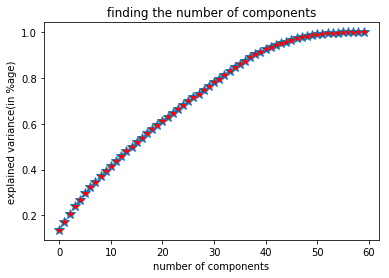

In [129]:
plt.plot(np.cumsum(pc.explained_variance_ratio_),marker='*',linestyle='dashed',markerfacecolor='red',markersize=10)

plt.xlabel('number of components')
plt.ylabel('explained variance(in %age)')
plt.title('finding the number of components')

In [130]:
lr3=LinearRegression()     #fitting regression model for pca data

lrmodel3=lr3.fit(pca_train,ytrain1)

lrpred3=lrmodel3.predict(pca_test)

rmse3=np.sqrt(mean_squared_error(lrpred3,ytest1))
print(rmse3)

r_sq=r2_score(lrpred3,ytest1)

print(r_sq)      #model performance after applying pca reduces

0.9623222306445606
0.9270600352032781


In [131]:
xdummy1.shape

(42535, 52)

In [132]:
#classification model( for loan_status)

In [133]:
x1=xdummy1           #initiating x & y
#here x is smae like xdummy1 in which multi-collinearity is treated
y1=data['loan_status']

x1.shape

(42535, 52)

In [134]:
y1.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [135]:
y1=y1.replace(['Fully Paid', 'Charged Off'],[0,1])

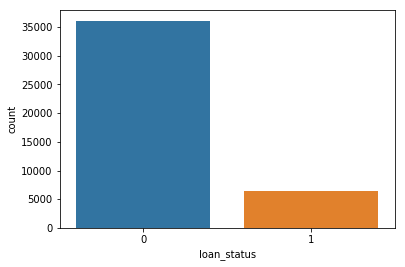

In [136]:
y1.value_counts()


6431/(36104+6431)             #data has imbalance
                              #the ratio of fully paid to charged off is 85:15   i.e charged off category accounts for only 15% datapoints in the data

sns.countplot(y1)

In [137]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x1,y1,test_size=0.3,random_state=3)

In [138]:
sc2=StandardScaler()                                                               #scaling the data
xtrainscale2=pd.DataFrame(sc2.fit_transform(xtrain2),columns=xtrain2.columns)

xtestscale2=pd.DataFrame(sc2.transform(xtest2),columns=xtest2.columns)


In [139]:
ytrain2.value_counts()        #value counts before application of smote

0    25270
1     4504
Name: loan_status, dtype: int64

In [140]:
from imblearn.over_sampling import SMOTE                  #applying smote
smt = SMOTE()
x_train, y_train = smt.fit_sample(xtrainscale2, ytrain2)

In [141]:
unique,count=np.unique(y_train,return_counts=True)

ytrain_smote_value_count= {k:v for (k,v) in zip(unique,count)}

ytrain_smote_value_count             #value_counts after applying smote

{0: 25270, 1: 25270}

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
logR=LogisticRegression()        #fitting classification model

logmodel=logR.fit(x_train,y_train)

logpred=logmodel.predict(xtestscale2)

logacc=metrics.accuracy_score(logpred,ytest2)
print(logacc)

logcm=metrics.confusion_matrix(logpred,ytest2)

logcm

F:\PGPDSE\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9661468536948515


array([[10560,   158],
       [  274,  1769]], dtype=int64)

In [144]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [145]:
rfc=RandomForestClassifier()

gbc=GradientBoostingClassifier()

abc=AdaBoostClassifier(n_estimators=100)



In [146]:
models=[rfc,gbc,abc,logR]

In [147]:
for a in models:
    a.fit(x_train,y_train)
    predict=a.predict(xtestscale2)
    Accuracy=metrics.accuracy_score(ytest2,predict)
    cm=metrics.confusion_matrix(ytest2,predict)
    cr=metrics.classification_report(ytest2,predict)
    kuppa=metrics.cohen_kappa_score(ytest2,predict)
    
    print(a)
    print(Accuracy)
    print(kuppa)
    print(cm)
    print(cr)
    
    

F:\PGPDSE\Python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9979625421205235
0.9920095184667146
[[10834     0]
 [   26  1901]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10834
           1       1.00      0.99      0.99      1927

    accuracy                           1.00     12761
   macro avg       1.00      0.99      1.00     12761
weighted avg       1.00      1.00      1.00     12761

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss

F:\PGPDSE\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.9661468536948515
0.8711595980204287
[[10560   274]
 [  158  1769]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     10834
           1       0.87      0.92      0.89      1927

    accuracy                           0.97     12761
   macro avg       0.93      0.95      0.94     12761
weighted avg       0.97      0.97      0.97     12761



In [148]:

rfc1=RandomForestClassifier()

gbc1=GradientBoostingClassifier()

abc1=AdaBoostClassifier(n_estimators=100)
logR1=LogisticRegression()
models=[rfc1,gbc1,abc1,logR1]
for a in models:
    a.fit(pca_train,ytrain2)
    predict=a.predict(pca_test)
    Accuracy=metrics.accuracy_score(ytest2,predict)
    cm=metrics.confusion_matrix(ytest2,predict)
    cr=metrics.classification_report(ytest2,predict)
    kuppa=metrics.cohen_kappa_score(ytest2,predict)
    
    print(a)
    print(Accuracy)
    print(kuppa)
    print(cm)
    print(cr)

    
 

F:\PGPDSE\Python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9463208212522529
0.7574886497651856
[[10812    22]
 [  663  1264]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10834
           1       0.98      0.66      0.79      1927

    accuracy                           0.95     12761
   macro avg       0.96      0.83      0.88     12761
weighted avg       0.95      0.95      0.94     12761

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss

F:\PGPDSE\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.9933390800094036
0.9735424233606924
[[10834     0]
 [   85  1842]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10834
           1       1.00      0.96      0.98      1927

    accuracy                           0.99     12761
   macro avg       1.00      0.98      0.99     12761
weighted avg       0.99      0.99      0.99     12761



In [150]:
xdummy1.columns

Index(['installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt_inv', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'term_60',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'emp_length_2-5 years', 'emp_length_5-8 years',
       'emp_length_More than 9', 'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'

In [152]:
xdummy1.shape

(42535, 52)